## Importing Libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

## 1. Reading  the Data.

In [2]:
df = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')        #Reading the data from the csv file.
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


Data Description:

 1. ID:	Customer ID							
 2. Age:	Customer's age in completed years							
 3. Experience:	#years of professional experience							
 4. Income:	Annual income of the customer(Dollar)	
 5. ZIP Code:	Home Address ZIP code.		
 6. Family:	Family size of the customer		
 7. CCAvg:	Avg. spending on credit cards per month(Dollar)							
 8. Education:	Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional							
 9. Mortgage:	Value of house mortgage if any. (Dollar)							
 10. Personal Loan:	Did this customer accept the personal loan offered in the last campaign?							
 11. Securities Account:	Does the customer have a securities account with the bank?							
 12. CD Account:	Does the customer have a certificate of deposit (CD) account with the bank?							
 13. Online:	Does the customer use internet banking facilities?							
 14. CreditCard:	Does the customer use a credit card issued by UniversalBank?							


In [3]:
df.columns                                                  # Columns in DataFrame

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [4]:
df.shape                                                    #Shape of DataFrame

(5000, 14)

In [5]:
#Reindexing to put Target Variable as the last column.

columnsTitles = ['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities Account',
       'CD Account', 'Online', 'CreditCard', 'Personal Loan']
df = df.reindex(columns=columnsTitles)
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0


In [6]:
df.info()

#All the columns have non null entries.
#All the columns have dtype as int64 except CCAvg.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
Personal Loan         5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
df[~df.applymap(np.isreal).all(1)] 

#All the entries in the DataFrame are real.

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan


In [8]:
df = df.drop('ID', axis = 1)                 #Dropping ID column as in contains redundant information.
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,1,0


In [9]:
df.describe()                         #Five point summary of DataFrame.

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.104400,0.06040,0.596800,0.294000,0.096000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.305809,0.23825,0.490589,0.455637,0.294621
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.00000,1.000000,1.000000,0.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.00000,1.000000,1.000000,1.000000


## 2. Study of data distribution in each attribute, findings shared.

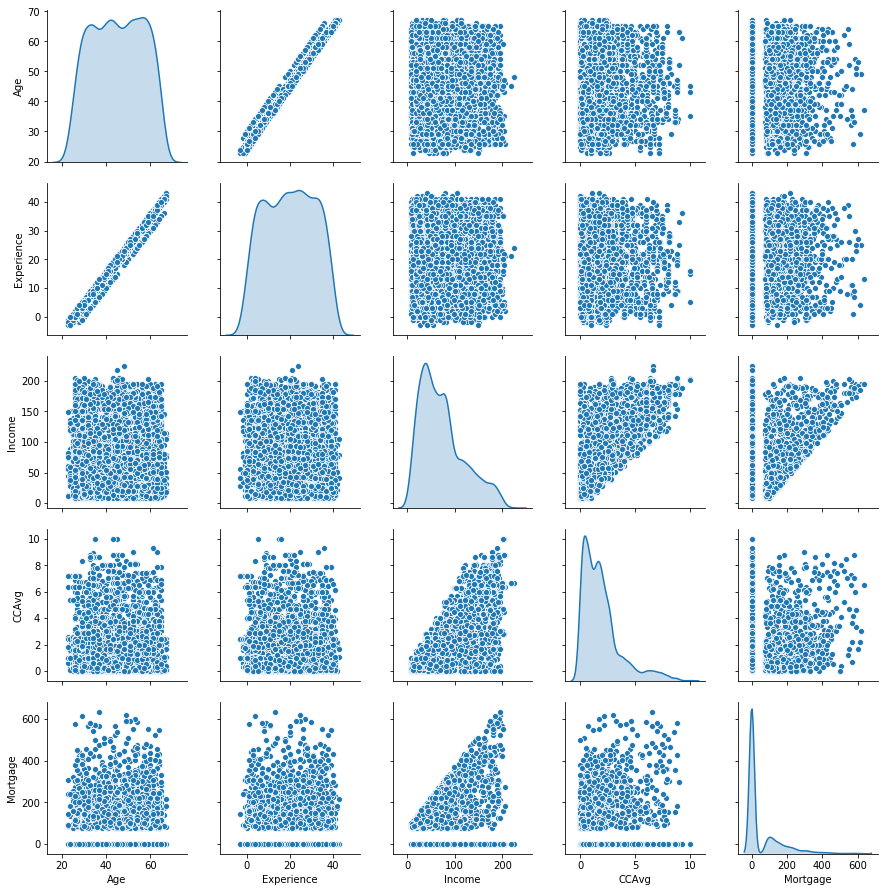

In [10]:
df_1 = df[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']]
sns.pairplot(df_1, diag_kind = 'kde')

#Inference is given below in Markdown.

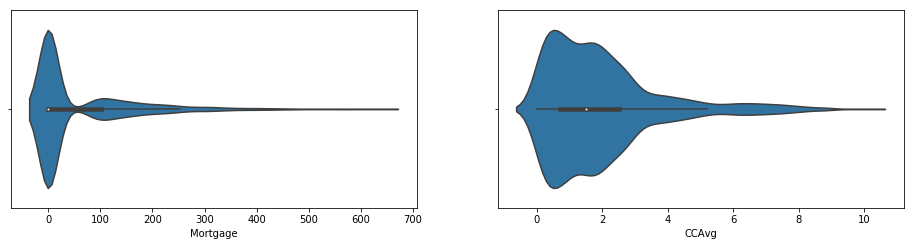

In [11]:
plt.figure(figsize = (16, 8))
plt.subplot(2,2,1)
sns.violinplot('Mortgage', data = df, )
plt.subplot(2,2, 2)
sns.violinplot('CCAvg', data = df)

#Inference below in Markdown.

From pairplot and violinplot, we observe,
1. Distribution of Age is somewhat normal with values in range of 20 to 60. Also there is positive relationship between Age and Experience.

2. Experience is also somewhat normally distributed, this column has some negative values as evident from the plot. These values will have to be imputed with appropriate values as Experience cannot be negative.

3. Income is positively skewed, which hints that this columns cotains outliers. 

4. CCAvg is also positively skewed, which again hints that it contains outliers. Majority of people have less than 3k of expenditure on Average on Credit Cards. 

5. Mortgage is heavily postively skewed and it seems to be bimodal. There are two chucks of people, first, who are centered around zero and second, who are centered around 100k.


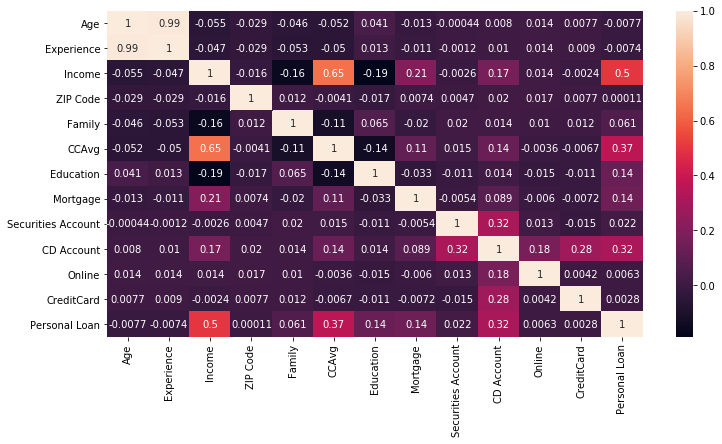

In [12]:
plt.figure(figsize = (12, 6))
sns.heatmap(df.corr(), annot = True)

#Inference below in Markdown.

Three observations that come from the heatmap are:

1. There is a very high correlation between Age and Experience and the information provided by one of the two columns would be redundant.

2. Income has a high correlation with Personal Loan(Target Varibale) and CCAvg.

3. Personal Loan has a high correlation with CCAVg, which is also indicated by above point and so information coming from above two columns may be redundant.

Feature extraction should be performed to take care of the correlation between features, which is out of scope of this project.

## 3. The target column distribution and comments on it.

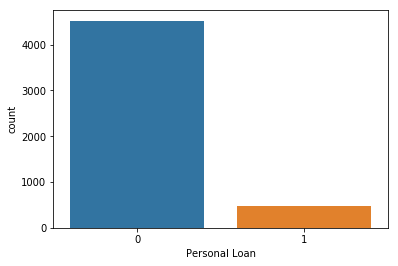

In [13]:
sns.countplot('Personal Loan', data = df)

#Success Ratio of Personal Loan application is very low.

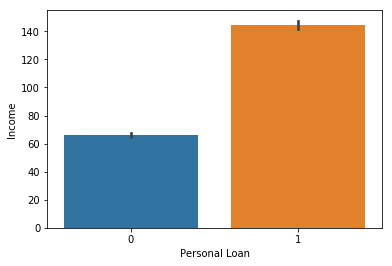

In [14]:
sns.barplot('Personal Loan', 'Income', data = df)

#Average income for persons who applied for Personal Loan is much higher that persons who did not.

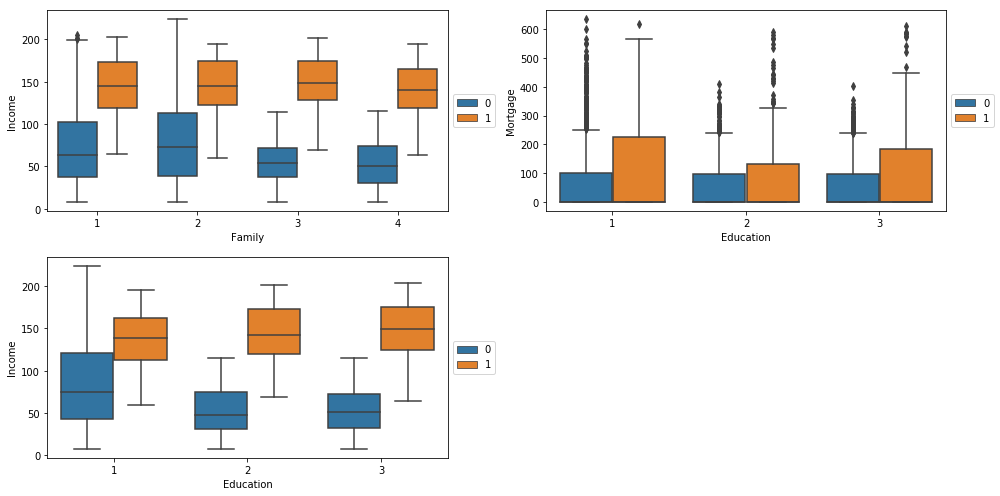

In [15]:
plt.figure(figsize = (14, 7))
plt.subplot(2,2,1)
sns.boxplot(x = 'Family', y = 'Income', hue = 'Personal Loan', data = df)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

#Personal Loan is 1 only for high income earners, irrespective of family members.


plt.subplot(2,2,2)
sns.boxplot(x = 'Education', y = 'Mortgage', hue = 'Personal Loan', data = df)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

#Undergrads have relatively high Mortgage than others, specially among those who applied for the Personal Loan.


plt.subplot(2,2,3)
sns.boxplot(x = 'Education', y = 'Income', hue = 'Personal Loan', data = df)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

#Irrespective of level of Education, only high income earners apply for the Personal Loan.

plt.tight_layout()



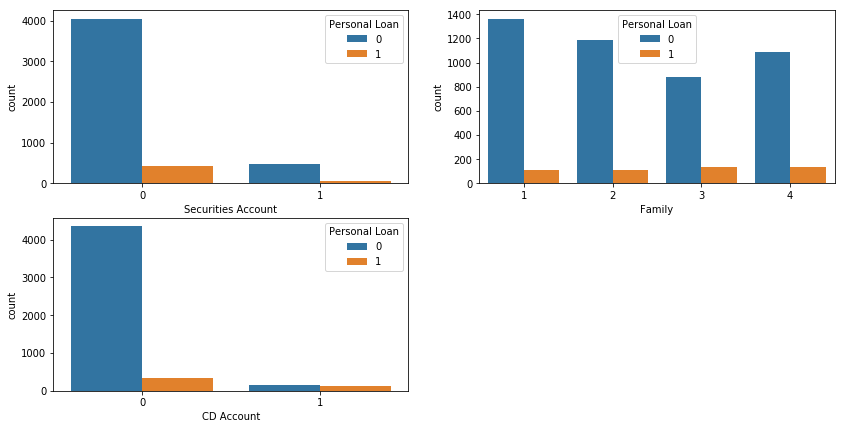

In [16]:
plt.figure(figsize = (14, 7))
plt.subplot(2,2,1)
sns.countplot(x = 'Securities Account' , hue = 'Personal Loan', data = df)

#Majority of people do not have Securities Account, but the ones who do have, in general do not apply for the Personal Loan.


plt.subplot(2,2,2)
sns.countplot(x = 'Family', hue = 'Personal Loan', data = df)

#Application of Personal Loan does not depend on Family Members.


plt.subplot(2,2,3)
sns.countplot(x = 'CD Account', hue = 'Personal Loan', data = df)

#People who do not have CD Account, relatively apply for Personal Loans more.

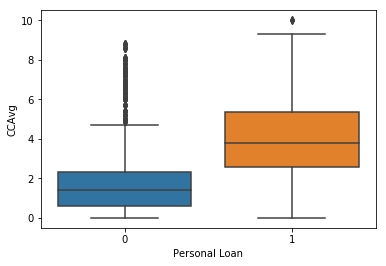

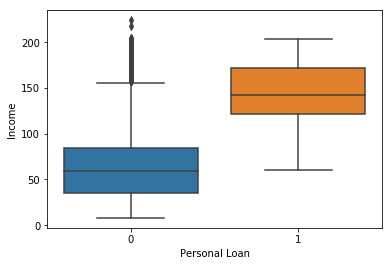

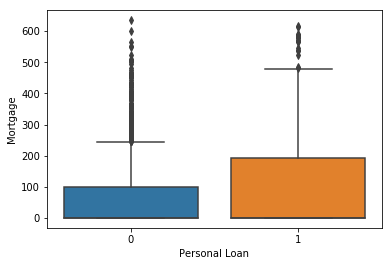

In [17]:
cols = df[['CCAvg', 'Income', 'Mortgage']]
for i in cols.columns:
    sns.boxplot('Personal Loan', i, data = df)
    plt.show()
    
#Plot 1, People with more CCAvg apply for Personal Loans. Also there are many outliers in the category of 0.
#Plot 2, People with more Income apply for Personal Loans. Also there are many outliers in the category of 0.
#Plot 3, The spread of Mortgage is large for the ones who apply for Personal Loans, meaining Personal Loan 1 category also
# has some people who have high mortgages than ones who don't.

Personal Loan
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: CCAvg, dtype: object

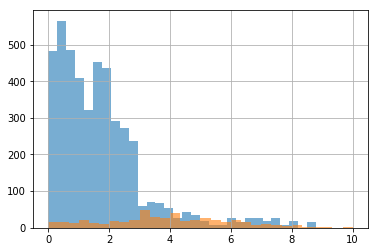

In [18]:
df.groupby('Personal Loan')['CCAvg'].hist(alpha=0.6, bins = 30)

#Histogram shows that for category 1 of Personal Loans, values of CCAvg are considerably high.

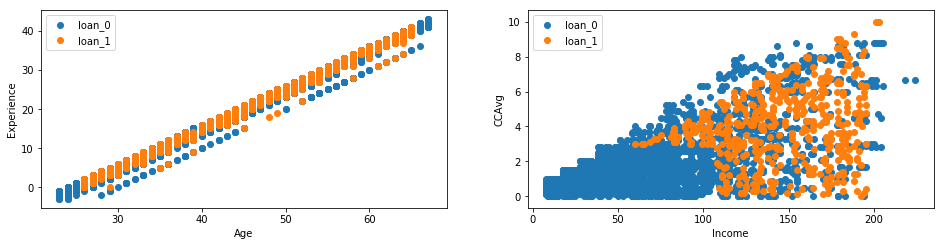

In [19]:
loan_0 = df[df['Personal Loan'] == 0]
loan_1 = df[df['Personal Loan'] == 1]

plt.figure(figsize = (16,8))
plt.subplot(2,2,1)
plt.scatter('Age', 'Experience', label = 'loan_0', data = loan_0)
plt.scatter('Age', 'Experience', label = 'loan_1', data = loan_1)
plt.xlabel('Age')
plt.ylabel('Experience')
plt.legend()

#Age and Experience are heavily positively correlated.

plt.subplot(2,2,2)
plt.scatter('Income', 'CCAvg', label = 'loan_0', data = loan_0)
plt.scatter('Income', 'CCAvg', label = 'loan_1', data = loan_1)
plt.xlabel('Income')
plt.ylabel('CCAvg')
plt.legend()

#Income for ones who applied for Personal Loans are generally higher, and there is a positive correlation between CCAvg
#and Income.


## 4. Splitting data into training and testing.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = df.drop(['ZIP Code', 'Personal Loan', 'Experience'], axis = 1)                        #Features
y = df['Personal Loan']                                                                   #Target Variables.

#Splitting the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=12345)

#Scaling features.
sc=StandardScaler()                                                          
scaledX_train = sc.fit_transform(X_train)                                    
scaledX_test = sc.transform(X_test)

## 5. & 6. Fitting different models and printing confusion matrix.

### K- Nearest Neighbors

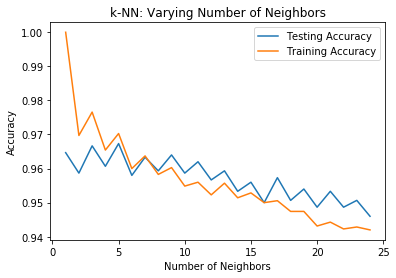

In [21]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = np.arange(1, 25)
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    train = []
    test = []
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaledX_train,y_train)
    train.append(knn.score(scaledX_train,y_train))
    test.append(knn.score(scaledX_test,y_test))
    
    #Compute accuracy on the training set
    train_accuracy_plot[i] = np.mean(train)
    
    #Compute accuracy on the testing set
    test_accuracy_plot[i] = np.mean(test)
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_plot, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

#We observe that for k = 5, Test accuracy is highest.

In [22]:
#Fitting KNN using k = 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(scaledX_train, y_train)
y_pred = knn.predict(scaledX_test)
print('Accuracy for KNN is', knn.score(scaledX_test, y_test))

print('\n')

from sklearn.metrics import confusion_matrix, classification_report
print('Confusion Matrix', '\n', confusion_matrix(y_test, y_pred))

print('\n')

print('Classification Report', '\n', classification_report(y_test, y_pred))



# We observe that accuracy is 96.7%.

Accuracy for KNN is 0.9673333333333334


Confusion Matrix 
 [[1357    6]
 [  43   94]]


Classification Report 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1363
           1       0.94      0.69      0.79       137

   micro avg       0.97      0.97      0.97      1500
   macro avg       0.95      0.84      0.89      1500
weighted avg       0.97      0.97      0.97      1500



### Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model = LogisticRegression()
model.fit(scaledX_train, y_train)
y_predict = model.predict(scaledX_test)
model_score = model.score(scaledX_test, y_test)
print('Accuracy for Logistic Regression is', model.score(scaledX_test, y_test))

print('\n')

from sklearn.metrics import confusion_matrix, classification_report
print('Confusion Matrix', '\n', confusion_matrix(y_test, y_predict))

print('\n')

print('Classification Report', '\n', classification_report(y_test, y_predict))

#We observe an accuracy of 95.6%.

Accuracy for Logistic Regression is 0.9566666666666667


Confusion Matrix 
 [[1347   16]
 [  49   88]]


Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      1363
           1       0.85      0.64      0.73       137

   micro avg       0.96      0.96      0.96      1500
   macro avg       0.91      0.82      0.85      1500
weighted avg       0.95      0.96      0.95      1500



## Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

nb = GaussianNB()                             #Instantiating GuassianNB
nb.fit(scaledX_train, y_train)  
y_pred = nb.predict(scaledX_test)
print('Accuracy for Naive Bayes is', nb.score(scaledX_test, y_test))

print('\n')

from sklearn.metrics import confusion_matrix, classification_report
print('Confusion Matrix', '\n', confusion_matrix(y_test, y_pred))

print('\n')

print('Classification Report', '\n', classification_report(y_test, y_pred))
#We see an accuracy of 89% which is less than that obtained from Logistic Regression and KNN.

Accuracy for Naive Bayes is 0.896


Confusion Matrix 
 [[1252  111]
 [  45   92]]


Classification Report 
               precision    recall  f1-score   support

           0       0.97      0.92      0.94      1363
           1       0.45      0.67      0.54       137

   micro avg       0.90      0.90      0.90      1500
   macro avg       0.71      0.80      0.74      1500
weighted avg       0.92      0.90      0.90      1500



## 7. Reasoning and Explanation for best model.

1. KNN -- This model performs better when decision boundary is highly non- linear since it is a non parametric approach and does not make any assumptions about decision boundary.

2. Logistic Regression -- Logistic Regression assumes linear decision boundary. Also it is suitable for Binomial Target Variable.

3. Naive Bayes -- Bayes classifier in GaussianNB assumes Features(predictors) are normally distributed and are independent of each other.

Best Model - Here we see that best accuracy is obtained by modelling data with KNN. 

Explanation - 

1. KNN vs Naive Bayes: KNN works better than Naive Bayes because it is a non - paramatric approach and does not make any assumption out of features such as they are independent of each other or are normally distributed. And so on account of this Naive Bayes performs relatively poorly.

2. KNN vs Logistic Regression: Logistic Regression works better than KNN because it turns out data the we've have been presented with has a Non-Linear Decision Boundary, i.e true function is non-linear. KNN is suitable for complex models, and when we choose k = 3, we're actually choosing a non-linear model which is close to true function. 
